# AUTONORMALIZE DEMO 
Using Autonormalize to normalize a kaggle dataset about food purchasing.

In [1]:
import os

import pandas as pd
import autonormalize as an

In [2]:
food_df = pd.read_csv(os.path.join(os.getcwd(), 'autonormalize/downloads/food.csv'), encoding='latin1')
food_df = food_df.drop(columns=food_df.columns[10:])

In [3]:
food_df

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71
5,AFG,2,Afghanistan,2514,Maize and products,5142,Food,1000 tonnes,33.94,67.71
6,AFG,2,Afghanistan,2517,Millet and products,5142,Food,1000 tonnes,33.94,67.71
7,AFG,2,Afghanistan,2520,"Cereals, Other",5142,Food,1000 tonnes,33.94,67.71
8,AFG,2,Afghanistan,2531,Potatoes and products,5142,Food,1000 tonnes,33.94,67.71
9,AFG,2,Afghanistan,2536,Sugar cane,5521,Feed,1000 tonnes,33.94,67.71


In [4]:
entityset = an.auto_entityset(food_df, name='Foods')

100%|██████████| 10/10 [00:06<00:00,  1.58it/s]


[{'Area Code', 'Element', 'Item Code'}, {'Area Code', 'Item Code', 'Element Code'}, {'latitude', 'Element', 'Item Code'}, {'latitude', 'Item Code', 'Element Code'}, {'Element', 'Item Code', 'longitude'}, {'Element', 'Item Code', 'Area'}, {'Item Code', 'longitude', 'Element Code'}, {'Item Code', 'Area', 'Element Code'}]
[(['Area Code'], 'Area Abbreviation'), (['Area Code'], 'Area'), (['Item Code'], 'Item'), (['Element Code'], 'Element'), (['Element Code'], 'Unit'), (['Item Code'], 'Unit'), (['Area Code'], 'Unit'), (['Area Code'], 'latitude'), (['Area Code'], 'longitude')]
[['Area Code']]
[(['Item Code'], 'Item'), (['Element Code'], 'Element')]
[['Item Code'], ['Element Code']]
[(['Element Code'], 'Element')]
[['Element Code']]
[(['Area Abbreviation'], 'Unit')]
[['Area Abbreviation']]


In [5]:
entityset

Entityset: Foods
  Entities:
    Area Code_Item Code_Element Code [Rows: 21477, Columns: 4]
    Element Code [Rows: 2, Columns: 2]
    Item Code [Rows: 117, Columns: 2]
    Area Code [Rows: 174, Columns: 5]
    Area Abbreviation [Rows: 169, Columns: 2]
  Relationships:
    Area Code_Item Code_Element Code.Area Code -> Area Code.Area Code
    Area Code_Item Code_Element Code.Item Code -> Item Code.Item Code
    Area Code_Item Code_Element Code.Element Code -> Element Code.Element Code
    Area Code.Area Abbreviation -> Area Abbreviation.Area Abbreviation

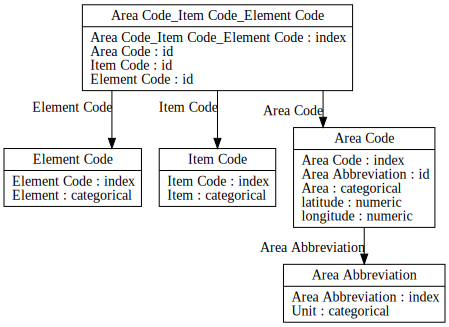

In [6]:
entityset.plot()

In [ ]:
deps = an.find_dependencies(food_df)
print(deps)
food_df

 80%|████████  | 8/10 [00:04<00:01,  1.96it/s]

In [ ]:
import featuretools as ft
fm, features = ft.dfs(entityset=entityset, target_entity='Element Code_Area_Item Code')
features